In [1]:
import pandas as pd
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# 이상치 탐지

<AxesSubplot:>

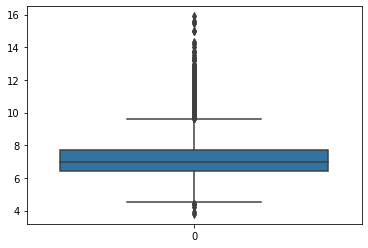

In [5]:
# 데이터 복사본 생성
train2 = train.copy()

# boxplot 그리기
sns.boxplot(data=train2['fixed acidity'])

# 이상치 제거
**IQR**: 3분위수 - 1분위수
* 3분위수(75%에 위치한 값)
* 1분위수(25%에 위치한 값)

In [6]:
import numpy as np

# 25%에 위치한 값 구하기
quantile_25 = np.quantile(train2['fixed acidity'], 0.25)

# 75%에 위치한 값 구하기
quantile_75 = np.quantile(train2['fixed acidity'], 0.75)

# IQR 구하기
IQR = quantile_75 - quantile_25

# minimum
minimum = quantile_25 - 1.5*IQR

# maximum
maximum = quantile_75 + 1.5*IQR

# maximum 이하, minimum 이상 값들만 저장
train2 = train2[(train2['fixed acidity'] >= minimum) & (train2['fixed acidity'] <= maximum)]

In [10]:
# train, train2 shape 비교
print('train: ', train.shape)
print('train2: ', train2.shape)

# 이상값 갯수
print('이상치 갯수: ', train.shape[0]-train2.shape[0])

train:  (5497, 14)
train2:  (5203, 14)
이상치 갯수:  294


# 수치데이터 정규화

In [11]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 분포 확인
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


/home/junho/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

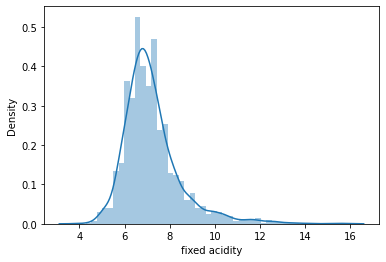

In [12]:
# distplot 그리기
sns.distplot(train['fixed acidity'])

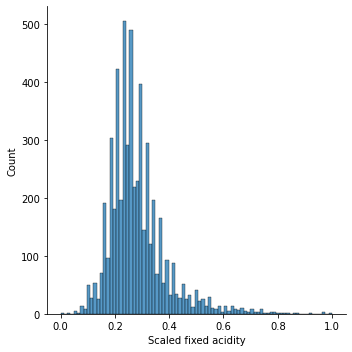

In [18]:
# scaler 객체 만들기
scaler = MinMaxScaler()

# scaler 학습
scaler.fit(train[['fixed acidity']])

# 정규화된 데이터 저장
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# 정규화된 데이터 displot 그리기
sns.displot(train['Scaled fixed acidity'])

# 원-핫 인코딩

In [36]:
from sklearn.preprocessing import OneHotEncoder

# 원-핫 인코더 객체 생성
encoder = OneHotEncoder()

# type 피쳐 학습
encoder.fit(train[['type']])

# 인코딩
onehot = encoder.transform(train[['type']])

# array 형태로 변환
onehot = onehot.toarray()

# 데이터프레임 형태로 변환
onehot = pd.DataFrame(onehot)

# onehot을 원본에 병합
train3 = train.copy()
train3 = pd.concat([train3, onehot], axis=1)

# type 변수 제거
train3 = train3.drop(columns=['type'])

train3

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,0,1
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0.322314,0.0,1.0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0.206612,0.0,1.0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0.330579,0.0,1.0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0.231405,0.0,1.0
